<a href="https://colab.research.google.com/github/ivanpalenciab/prediccion-precio-maiz/blob/Primera_fase/1_Data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
d = pd.read_csv("/content/drive/MyDrive/prediccion_productos_agro/CHRIS-CME_C5.csv")
d.head(5)

,Date,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
0,2021-06-29,560.00,570.25,553.75,531.00,0.75,560.00,7481.0,55003.0
1,2021-06-28,531.00,560.00,530.00,557.50,28.00,559.25,5243.0,54017.0
2,2021-06-25,546.00,553.00,530.50,530.00,-16.75,531.25,5852.0,52583.0
3,2021-06-24,545.25,553.25,526.25,547.25,0.50,548.00,7989.0,51094.0
4,2021-06-23,548.50,553.25,540.75,544.25,-2.50,547.50,8307.0,50527.0


En el estudio se usaron los precios de cierre diarios por lo que solo conservaremos la fecha y la columna lasr

In [ ]:
data=d[["Date","Last"]]
data.head()

,Date,Last
0,2021-06-29,531.00
1,2021-06-28,557.50
2,2021-06-25,530.00
3,2021-06-24,547.25
4,2021-06-23,544.25


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15129 entries, 0 to 15128
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    15129 non-null  object 
 1   Last    15129 non-null  float64
dtypes: float64(1), object(1)
memory usage: 236.5+ KB


In [ ]:
data["Date"] = pd.to_datetime(data["Date"],format='%Y-%m-%d')

<ipython-input-7-9e4fb07b5015>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"] = pd.to_datetime(data["Date"],format='%Y-%m-%d')


In [ ]:
filtro = (data['Date'] > "1980-01-01") & (data['Date'] <= "2021-06-29")
data = data.loc[filtro]

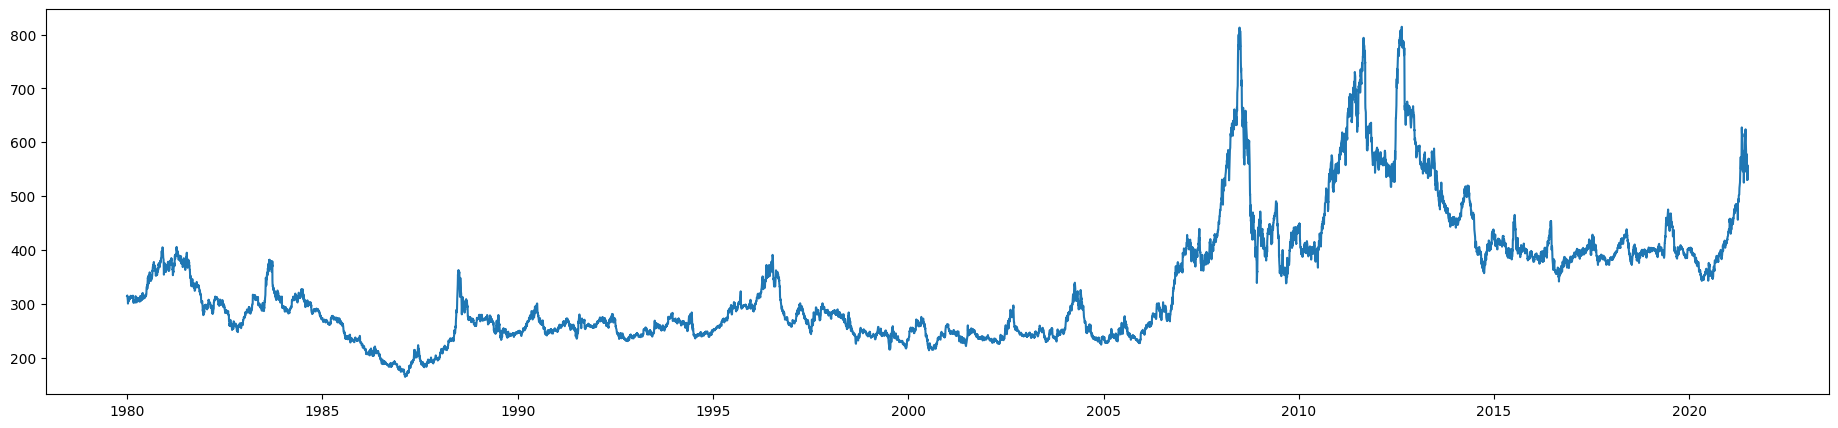

In [ ]:
plt.figure(figsize=(23, 5))
plt.plot(data["Date"], data["Last"], label='Precio Maiz')

In [ ]:
ruta = "/content/drive/MyDrive/prediccion_productos_agro/datos_maiz.csv"
data.to_csv(ruta,index=False)